<a href="https://colab.research.google.com/github/mitali-datascientist/PythonOperationsandProjects/blob/master/Cartooning_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision helps in developing Varied Operations on Images. 

## Here we will first see a simple implementation for this. 

In [1]:
# importing libraries 
import cv2 
import numpy as np 
from google.colab.patches import cv2_imshow

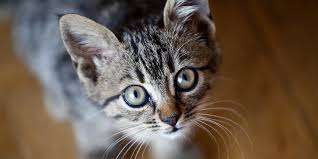

In [2]:
# reading image 
img = cv2.imread("/content/cat.jpg")
cv2_imshow(img)

In [11]:
def cartoonize(img): 
  numBilateralFilters = 4
  img_color = img
  cv2_imshow(img_color)

  for _ in range(numBilateralFilters):
    img_color = cv2.bilateralFilter(img_color, 15,30,20)
  cv2_imshow(img_color)

  img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  img_blur = cv2.medianBlur(img_gray, 7)
  #cv2_imshow(img_blur)

  img_edge = cv2.adaptiveThreshold(img_blur, 2,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 3, 2)
  #cv2_imshow(img_edge)

  img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB)
  return cv2.bitwise_and(img_color, img_edge)
  


In [12]:
real_inputs = []

cartoon_outputs = []

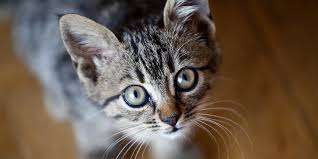

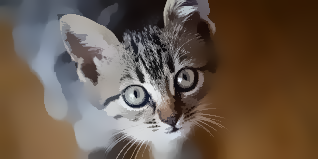

In [13]:
output = cartoonize(img)



### Trying another method

In [ ]:
import os
repo = "CartoonGan-tensorflow"
!git clone https://github.com/mnicnc404/{repo}.git
os.chdir(os.path.join(repo))

Cloning into 'CartoonGan-tensorflow'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 1584 (delta 3), reused 5 (delta 2), pack-reused 1577
Receiving objects: 100% (1584/1584), 345.93 MiB | 28.06 MiB/s, done.
Resolving deltas: 100% (688/688), done.
Checking out files: 100% (425/425), done.


In [ ]:
!ls | grep cartoonize.py

cartoonize.py


## Install packages
We will need TensorFlow 2.0 and [keras-contrib](https://github.com/keras-team/keras-contrib) packages.

In [ ]:
from IPython.display import clear_output, display, Image

In [ ]:
!pip install tensorflow-gpu==2.0.0-alpha0
!git clone https://www.github.com/keras-team/keras-contrib.git \
    && cd keras-contrib \
    && python convert_to_tf_keras.py \
    && USE_TF_KERAS=1 python setup.py install
clear_output()

In [ ]:
# For the current version: 
!pip install --upgrade tensorflow


Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.3.0)


In [ ]:
# To determine which version you're using:
!pip show tensorflow

Name: tensorflow
Version: 2.3.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: numpy, keras-preprocessing, grpcio, gast, tensorflow-estimator, termcolor, tensorboard, six, wrapt, h5py, google-pasta, scipy, opt-einsum, absl-py, wheel, astunparse, protobuf
Required-by: fancyimpute


In [ ]:
image_url = 'https://media.giphy.com/media/o5HKScC1PflLO/giphy.gif'  #@param {type: "string"}

In [ ]:
input_image_dir = "input_images"
output_image_dir = input_image_dir.replace("input_", "output_")

import time
if image_url:
    img_filename = image_url.split("/")[-1]
    name, ext = '.'.join(img_filename.split(".")[:-1]), img_filename.split(".")[-1]
    new_name = '_'.join((name, str(int(time.time()))))
    new_img_filename = '.'.join((new_name, ext))
    image_path = os.path.join(input_image_dir, new_img_filename)
    
    !wget {image_url} \
        && mv {img_filename} {new_img_filename} \
        && mv {new_img_filename} {image_path}

--2020-08-26 15:15:53--  https://media.giphy.com/media/o5HKScC1PflLO/giphy.gif
Resolving media.giphy.com (media.giphy.com)... 151.101.186.2
Connecting to media.giphy.com (media.giphy.com)|151.101.186.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1810699 (1.7M) [image/gif]
Saving to: ‘giphy.gif’

giphy.gif           100%[===================>]   1.73M  --.-KB/s    in 0.1s    

2020-08-26 15:15:53 (14.8 MB/s) - ‘giphy.gif’ saved [1810699/1810699]



In [ ]:
# a trick to show gif in notebook
if ".gif" in new_img_filename:
    png_path = new_img_filename + '.png'
    !cp {image_path} {png_path}

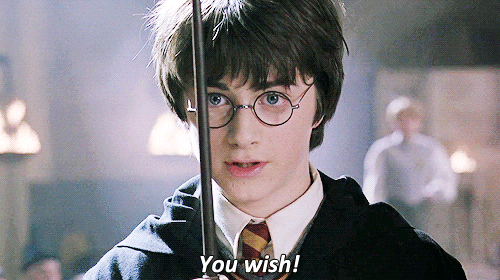

In [ ]:
display(Image(png_path))

## Cartoonize images using Python script
Transform the downloaded image using selected style.

In [ ]:
styles = "shinkai" #@param ["shinkai", "hayao", "hosoda", "paprika"]

In [ ]:
!python cartoonize.py \
    --styles {styles} \
    --batch_size 1 \
    --comparison_view horizontal

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

## Compare input with the caroonized result

In [ ]:
if img_filename:
    if ".gif" in img_filename:
        generated_gif = os.path.join(output_image_dir, "comparison", new_img_filename)
        result_path = generated_gif + '.png'
        !cp {generated_gif} {result_path}
    else:
        result_path = os.path.join(output_image_dir, "comparison", new_img_filename)

cp: cannot stat 'output_images/comparison/giphy_1598454953.gif': No such file or directory


In [ ]:
display(Image(result_path))

## Download the result


In [ ]:
include_original_image = "no"  #@param {type: "string"}

In [ ]:
from google.colab import files
if include_original_image == "yes":
    output_image_path = os.path.join(output_image_dir, "comparison", new_img_filename)
else:
    output_image_path = os.path.join(output_image_dir, styles, new_img_filename)
files.download(output_image_path)

FileNotFoundError: ignored

## Check all transformed_images

In [ ]:
!apt-get install tree
clear_output()